In [ ]:
!pip install MTCNN

Enter the image path: /content/IMG_20220928_150103.jpg
1/1 [==============================] - 0s 152ms/step


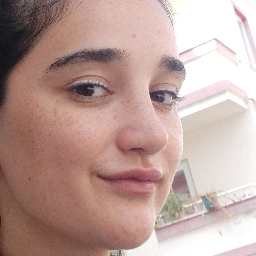

In [14]:
from mtcnn import MTCNN
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
def align_face(image, left_eye, right_eye):
    dx = right_eye[0] - left_eye[0]
    dy = right_eye[1] - left_eye[1]
    angle = np.arctan2(dy, dx) * 180. / np.pi

    desired_left_eye = (0.35, 0.35)
    desired_face_width = 256
    desired_face_height = desired_face_width

    hypotenuse = np.sqrt((dx * dx) + (dy * dy))
    desired_right_eye_x = 1.0 - desired_left_eye[0]

    desired_dist = (desired_right_eye_x - desired_left_eye[0])
    desired_dist *= desired_face_width
    scale = desired_dist / hypotenuse

    eyes_center = ((left_eye[0] + right_eye[0]) // 2,
                   (left_eye[1] + right_eye[1]) // 2)

    rotation_matrix = cv2.getRotationMatrix2D(eyes_center, angle, scale)


    tx = desired_face_width * 0.5
    ty = desired_face_height * desired_left_eye[1]

    rotation_matrix[0, 2] += (tx - eyes_center[0])
    rotation_matrix[1, 2] += (ty - eyes_center[1])

    aligned_face = cv2.warpAffine(image, rotation_matrix, (desired_face_width, desired_face_height))

    return aligned_face


# Initialize the MTCNN detector
detector = MTCNN()
img_path = input("Enter the image path: ")

image = cv2.imread(img_path, cv2.IMREAD_COLOR)
result = detector.detect_faces(image)
if result != []:
    for person in result:
        bounding_box = person['box']
        keypoints = person['keypoints']

        if person['confidence'] > 0.8:
            aligned_face = align_face(image, keypoints['left_eye'], keypoints['right_eye'])
            cv2_imshow(aligned_face)